In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np

iris = datasets.load_iris()
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)

In [2]:
def kNN(k, features_test, labels_test):
    preds = []
    for sample in features_test:
        distances = []
        for sampleTrain, labelTrain in zip(features_train, labels_train):
            distances.append((sampleTrain, distance.euclidean(sample, sampleTrain), labelTrain))
        distances.sort(key = lambda tup: tup[1])
        nearestNeighbours = []
        for i in range(k):
            nearestNeighbours.append((distances[i][0], distances[i][2]))
        nearestLabels = [row[-1] for row in nearestNeighbours]
        preds.append(max(set(nearestLabels), key = nearestLabels.count))
    return preds

preds = kNN(3, features_test, labels_test)
print('Accuracy: {}'.format(accuracy_score(labels_test, np.array(preds))))

Accuracy: 0.96


In [3]:
from sklearn.neighbors import KNeighborsClassifier

features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.7)
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X = features_train, y = labels_train)
preds = neigh.predict(features_test)
print('Accuracy: {0:.2f}'.format(accuracy_score(labels_test, np.array(preds))))

Accuracy: 0.96


In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(iris.data, iris.target)
tree.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

dot_data = StringIO() 
export_graphviz(tree, out_file = dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("C:\\Users\\HP\\Desktop\\chwytak\\Machine learning\\iris.pdf")

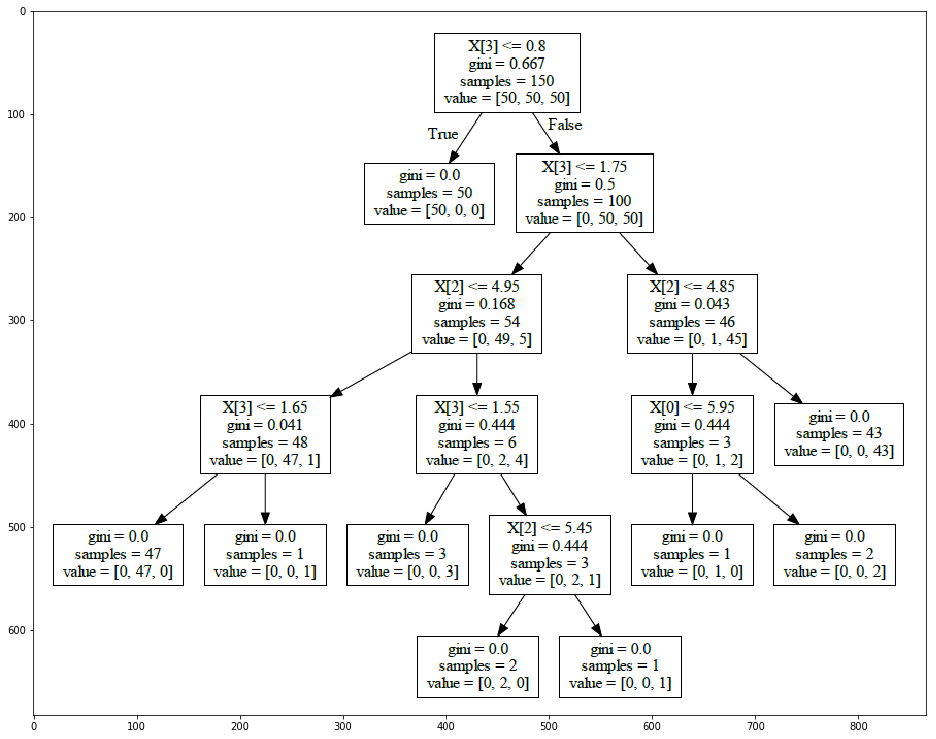

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('C:\\Users\\HP\\Desktop\\chwytak\\Machine learning\\iris.png')
plt.figure(figsize = [16, 16])
imgplot = plt.imshow(img)
plt.show()

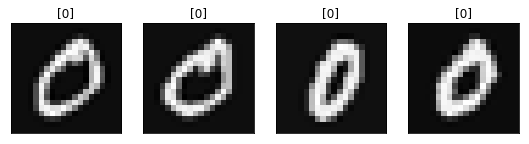

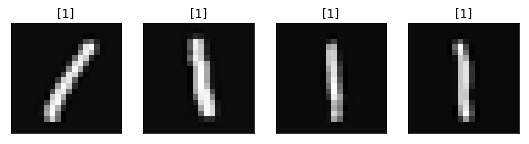

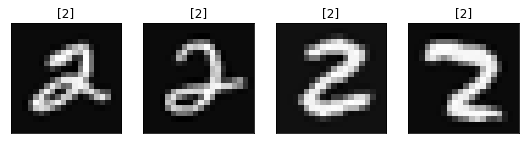

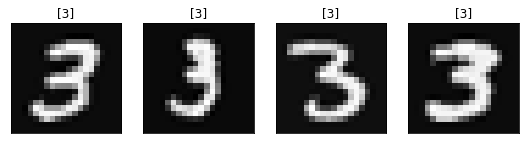

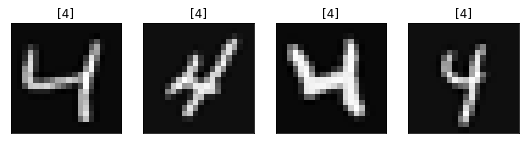

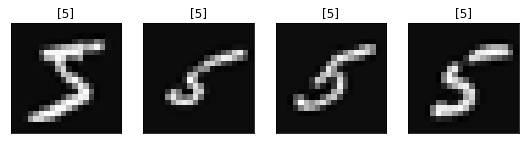

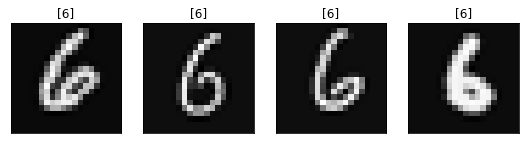

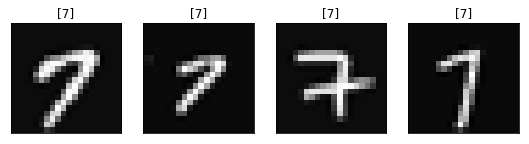

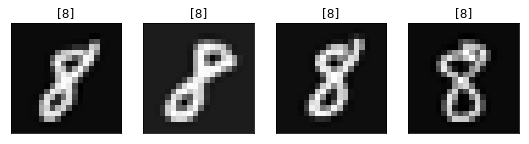

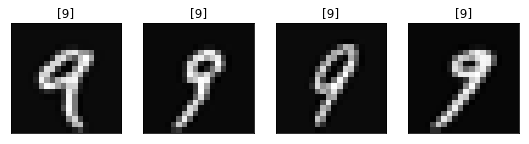

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from scipy.io import loadmat

data = loadmat('C:\\Users\\HP\\Desktop\\chwytak\\Machine learning\\mnist.mat')
X = data['X']
y = data['y']
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
y[np.where(y==10)]=0
h = 20
w = 20

def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

for i in range(10):
    plot_mnist(X[500*i:500*(i + 1)], y[500*i:500*(i + 1)], h, w, 1)

In [50]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3)
tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(XTrain, yTrain)
preds = tree.predict(XTest)
targetNames = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [51]:
print('F1: {0:.3f}'.format(f1_score(yTest, preds, average = 'micro')))

F1: 0.777


In [54]:
print('Confusion matrix: \n{}'.format(confusion_matrix(yTest, preds)))

Confusion matrix: 
[[124   0   4   2   0   3   1   0   2   1]
 [  0 130   3   2   5   0   4   7   1   1]
 [  3   3 107   9  14   0   3   7   8   2]
 [  0   2  10 103   2   6   0   3  10   6]
 [  1   4   4   1 123   3   6   2   5  18]
 [  6   2   0  13   3 103   3   3  10   2]
 [  3   5   6   0   2   9 123   0   3   2]
 [  0   2   4   5   4   2   1 111   1   8]
 [  1   7   8   9   4   3   2   2 108   7]
 [  0   1   1   7   5   3   1   1   6 133]]


In [56]:
print('Classification report: \n{}'.format(classification_report(yTest, preds, target_names = targetNames)))

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       137
           1       0.83      0.85      0.84       153
           2       0.73      0.69      0.71       156
           3       0.68      0.73      0.70       142
           4       0.76      0.74      0.75       167
           5       0.78      0.71      0.74       145
           6       0.85      0.80      0.83       153
           7       0.82      0.80      0.81       138
           8       0.70      0.72      0.71       151
           9       0.74      0.84      0.79       158

    accuracy                           0.78      1500
   macro avg       0.78      0.78      0.78      1500
weighted avg       0.78      0.78      0.78      1500

